<a href="https://colab.research.google.com/github/Mahinda25/CAT-2-DATA-SCIENCE/blob/main/CAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install necessary libraries.

In [133]:
!pip install pandas scikit-learn nltk


Upload your datasets.

In [146]:
import os
import pandas as pd

# Specify the directory containing the CSV files
directory_path = '/content/Election_strategy/'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create a dictionary to store DataFrames
dfs = {}

# Loop through each CSV file and read it
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    try:
        df = pd.read_csv(file_path)
        dfs[csv_file] = df  # Store the DataFrame in the dictionary
        print(f"Shape of the dataset in {csv_file}: {df.shape}")
    except FileNotFoundError:
        print(f"File not found at path: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"The CSV file {csv_file} is empty.")
    except pd.errors.ParserError:
        print(f"Error while parsing the CSV file {csv_file}.")

# Now, you can access each DataFrame using its corresponding file name
# to access the DataFrame for 'ordered_dc_draino.csv':
if 'ordered_dc_draino.csv' in dfs:
    df_ordered_dc_draino = dfs['ordered_dc_draino.csv']
    # further processing or analysis with df_ordered_dc_draino
    print(df_ordered_dc_draino.head())
else:
    print("DataFrame for 'ordered_dc_draino.csv' not found.")
# to access the DataFrame for 'dataset.csv':
if 'dataset.csv' in dfs:
    df_dataset = dfs['dataset.csv']
    # further processing or analysis with df_dataset
    print(df_dataset.head())
else:
    print("DataFrame for 'dataset.csv' not found.")
# to access the DataFrame for 'ExtractedTweets.csv':
if 'ExtractedTweets.csv' in dfs:
    df_ExtractedTweets = dfs['ExtractedTweets.csv']
    #further processing or analysis with df_ExtractedTweets
    print(df_ExtractedTweets.head())
else:
    print("DataFrame for 'dataset.csv' not found.")




Shape of the dataset in ordered_dc_draino.csv: (301, 20)
Shape of the dataset in ExtractedTweets.csv: (86461, 4)
Shape of the dataset in musae_facebook_target.csv: (5604, 4)


<ipython-input-146-ecaa4baa60ef>:17: DtypeWarning: Columns (0,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264

Shape of the dataset in VOTER_Survey_December16_Release1.csv: (8000, 669)
Shape of the dataset in dataset.csv: (2514, 11)
Shape of the dataset in TwitterHandles.csv: (48, 5)
          ID    Unnamed: 1 comments_disabled                       dimensions  \
0  user00001    __typename             False    {'height': 800, 'width': 640}   
1  user00002    GraphVideo             False  {'height': 1335, 'width': 1080}   
2  user00003    GraphImage             False  {'height': 1349, 'width': 1080}   
3  user00004  GraphSidecar             False  {'height': 1080, 'width': 1080}   
4  user00005    GraphImage             False  {'height': 1140, 'width': 1080}   

                                         display_url  edge_media_preview_like  \
0  https://scontent-lax3-1.cdninstagram.com/v/t51...                 280008.0   
1  https://scontent-lax3-1.cdninstagram.com/v/t51...                 274379.0   
2  https://scontent-lax3-1.cdninstagram.com/v/t51...                 254029.0   
3  https://scon

Split the Dataset into Training and Testing Sets

In [148]:
from sklearn.model_selection import train_test_split

# Assuming 'musae_facebook_target.csv' contains the target variable
target_file = 'musae_facebook_target.csv'

# Check if the target file is in the loaded DataFrames
if target_file in dfs:
    target_df = dfs[target_file]

    # Assuming 'user_id' is a common column for merging
    merged_data = pd.merge(df_dataset, target_df, on='ID')

    # Assuming 'target_column' is the column representing the target variable
    X = merged_data.drop('Political_party', axis=1)  # Features
    y = merged_data['Political_party']  # Target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}')
    print(f'Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}')
else:
    print(f"Target DataFrame '{target_file}' not found.")


Shape of X_train: (2011, 13), Shape of X_test: (503, 13)
Shape of y_train: (2011,), Shape of y_test: (503,)


In [150]:
# Check the column names in df_dataset and target_df
print(df_dataset.columns)
print(target_df.columns)

Index(['ID', 'Name', 'Twitter_username', 'Account_start_time', 'Account_ID',
       'Sex', 'Birthplace', 'Birthday', 'Age', 'Instagram_username',
       'Political_party'],
      dtype='object')
Index(['ID', 'facebook_id', 'page_name', 'page_type'], dtype='object')


Build a Random Forest Classifier

In [172]:
import pandas as pd
# Assuming 'y' is a numpy array
y = pd.Series(y)

# Remove rows where 'ID' is equal to 'Vicente'
X_cleaned = X[X['ID'] != ID_to_remove]
y_cleaned = y.loc[X_cleaned.index]

# Assuming 'ID' is the column containing 'Vicente'
ID_to_remove = 'Victor escobar'

# Remove rows where 'ID' is equal to 'Vicente'
X_cleaned = X[X['ID'] != ID_to_remove]
y_cleaned = y.loc[X_cleaned.index]

# Use one-hot encoding for categorical variables
X_encoded_cleaned = pd.get_dummies(X_cleaned, columns=['ID'])

# Split the cleaned dataset into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_encoded_cleaned, y_cleaned, test_size=0.2, random_state=42
)

# Check data types and null values
print(X_train_cleaned.info())
print(X_test_cleaned.info())

# Check column names
print(X_train_cleaned.columns)
print(X_test_cleaned.columns)

# Create Decision Tree model
dt_model_cleaned = DecisionTreeClassifier(random_state=42)

# Fit the model and make predictions
try:
    dt_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
    dt_predictions_cleaned = dt_model_cleaned.predict(X_test_cleaned)
except Exception as e:
    print(f"Error: {e}")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 2460 to 860
Columns: 2526 entries, Name to ID_User02515
dtypes: float64(2), object(10), uint8(2514)
memory usage: 5.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 617 to 1467
Columns: 2526 entries, Name to ID_User02515
dtypes: float64(2), object(10), uint8(2514)
memory usage: 1.3+ MB
None
Index(['Name', 'Twitter_username', 'Account_start_time', 'Account_ID', 'Sex',
       'Birthplace', 'Birthday', 'Age', 'Instagram_username', 'facebook_id',
       ...
       'ID_User02506', 'ID_User02507', 'ID_User02508', 'ID_User02509',
       'ID_User02510', 'ID_User02511', 'ID_User02512', 'ID_User02513',
       'ID_User02514', 'ID_User02515'],
      dtype='object', length=2526)
Index(['Name', 'Twitter_username', 'Account_start_time', 'Account_ID', 'Sex',
       'Birthplace', 'Birthday', 'Age', 'Instagram_username', 'facebook_id',
       ...
       'ID_User02506', 'ID_User02507', 'ID_User02508', 'ID_User02509',

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is a numpy array
y = pd.Series(y)

# Assuming 'ID' is the column containing 'Victor'
ID_to_remove = 'Victor escobar'

# Remove rows where 'ID' is equal to 'Victor'
X_cleaned = X[X['ID'] != ID_to_remove]
y_cleaned = y.loc[X_cleaned.index]

# Use one-hot encoding for categorical variables
X_encoded_cleaned = pd.get_dummies(X_cleaned, columns=['ID'])

# Split the cleaned dataset into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_encoded_cleaned, y_cleaned, test_size=0.2, random_state=42
)

# Check data types and null values
print(X_train_cleaned.info())
print(X_test_cleaned.info())

# Check column names
print(X_train_cleaned.columns)
print(X_test_cleaned.columns)

# Create Random Forest model
rf_model_cleaned = RandomForestClassifier(random_state=42)

# Fit the model and make predictions
try:
    rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
    rf_predictions_cleaned = rf_model_cleaned.predict(X_test_cleaned)
except Exception as e:
    print(f"Error: {e}")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 2460 to 860
Columns: 2526 entries, Name to ID_User02515
dtypes: float64(2), object(10), uint8(2514)
memory usage: 5.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 617 to 1467
Columns: 2526 entries, Name to ID_User02515
dtypes: float64(2), object(10), uint8(2514)
memory usage: 1.3+ MB
None
Index(['Name', 'Twitter_username', 'Account_start_time', 'Account_ID', 'Sex',
       'Birthplace', 'Birthday', 'Age', 'Instagram_username', 'facebook_id',
       ...
       'ID_User02506', 'ID_User02507', 'ID_User02508', 'ID_User02509',
       'ID_User02510', 'ID_User02511', 'ID_User02512', 'ID_User02513',
       'ID_User02514', 'ID_User02515'],
      dtype='object', length=2526)
Index(['Name', 'Twitter_username', 'Account_start_time', 'Account_ID', 'Sex',
       'Birthplace', 'Birthday', 'Age', 'Instagram_username', 'facebook_id',
       ...
       'ID_User02506', 'ID_User02507', 'ID_User02508', 'ID_User02509',

use the trained model to make predictions on the test data.

In [177]:
from sklearn.preprocessing import LabelEncoder
X = merged_data.drop('Political_party', axis=1)  # Features
y = merged_data['Political_party']  # Target variable

# Use LabelEncoder to convert string labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
!pip install category_encoders


In [203]:
merged_data['Political_party'].unique()

array(['Democratic Party', 'Republican Party', 'New Party Sakigake',
       'Japan Socialist Party', 'Minnesota Democratic–Farmer–Labor Party',
       'independent politician', 'California Democratic Party',
       'Democratic Party of the Virgin Islands',
       'Movimiento Victoria Ciudadana', 'LDPR',
       'Florida Democratic Party', 'The People of Freedom',
       'California Republican Party', 'American Nazi Party',
       'Populist Party', 'Unity', 'Republican Party of Iowa',
       'Libertarian Party', 'Utah Democratic Party',
       'Liberty Union Party', 'Michigan Republican Party',
       'Washington State Democratic Party', 'Conservative Party',
       'Green Party of Canada', 'New Democratic Party',
       'La République En Marche', 'Popular Democratic Party', 'New Right',
       'Republican Party of Minnesota',
       'Democratic Socialists of America', 'Justice Democrats',
       'Colorado Republican Party', 'North Carolina Republican Party',
       'Socialist Party USA'

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
import pandas as pd

# Assuming 'merged_data' is the original dataset
X = merged_data.drop('Political_party', axis=1)  # Features
y = merged_data['Political_party']  # Target variable

# Identify categorical columns
categorical_cols = ['ID']

# Create a ColumnTransformer to apply different encoders to different columns
# and impute missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ce.OrdinalEncoder(cols=categorical_cols), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ]
)

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(cols=['ID']),
                                                  ['ID']),
                                                 ('num', SimpleImputer(),
                                                  Index(['Age', 'facebook_id'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Evaluate the model

In [206]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.47
Classification Report:
                                                   precision    recall  f1-score   support

                        Arizona Republican Party       0.00      0.00      0.00         1
                     California Democratic Party       0.00      0.00      0.00         8
                     California Republican Party       0.00      0.00      0.00         1
                       Colorado Republican Party       0.00      0.00      0.00         1
                                Democratic Party       0.47      0.98      0.64       238
                        Florida Democratic Party       0.00      0.00      0.00         1
                Green Party of the United States       0.00      0.00      0.00         2
                 Independence Party of Minnesota       0.00      0.00      0.00         1
                         Liberal Party of Canada       0.00      0.00      0.00         1
                               Libertarian Party       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


visualize the decision tree

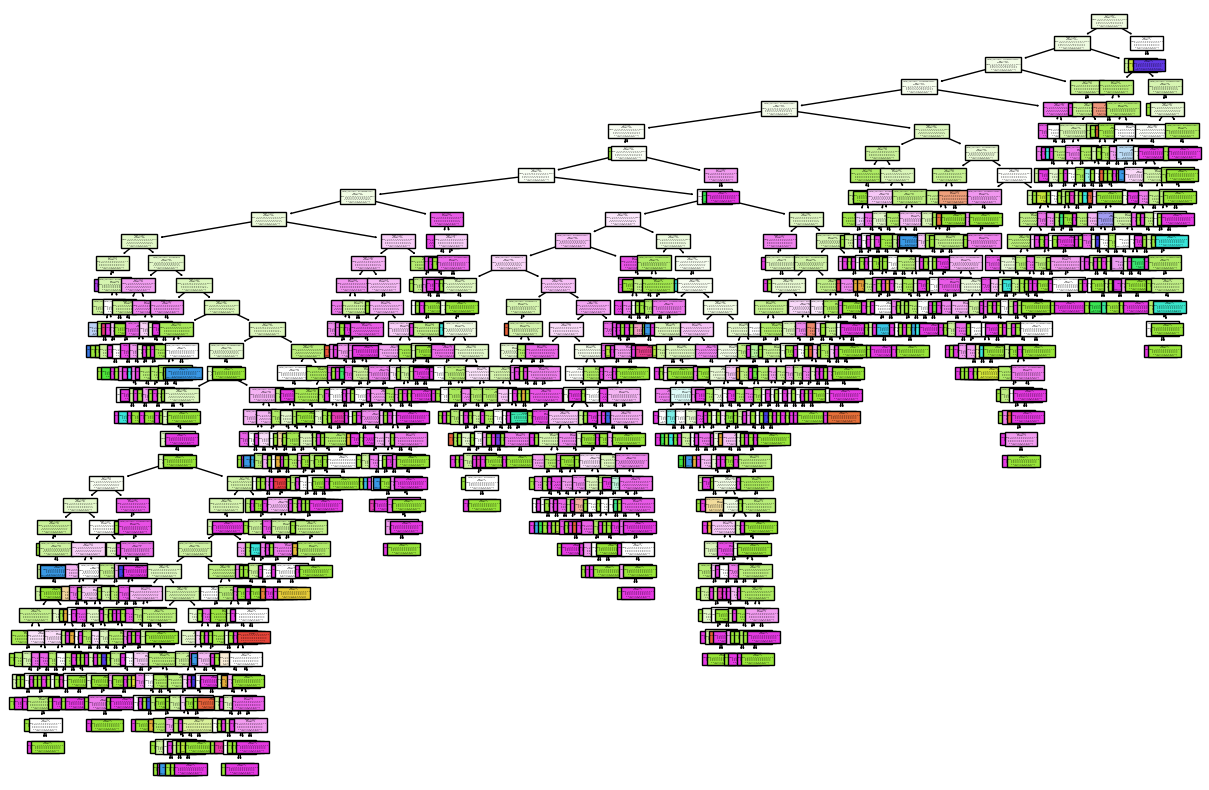

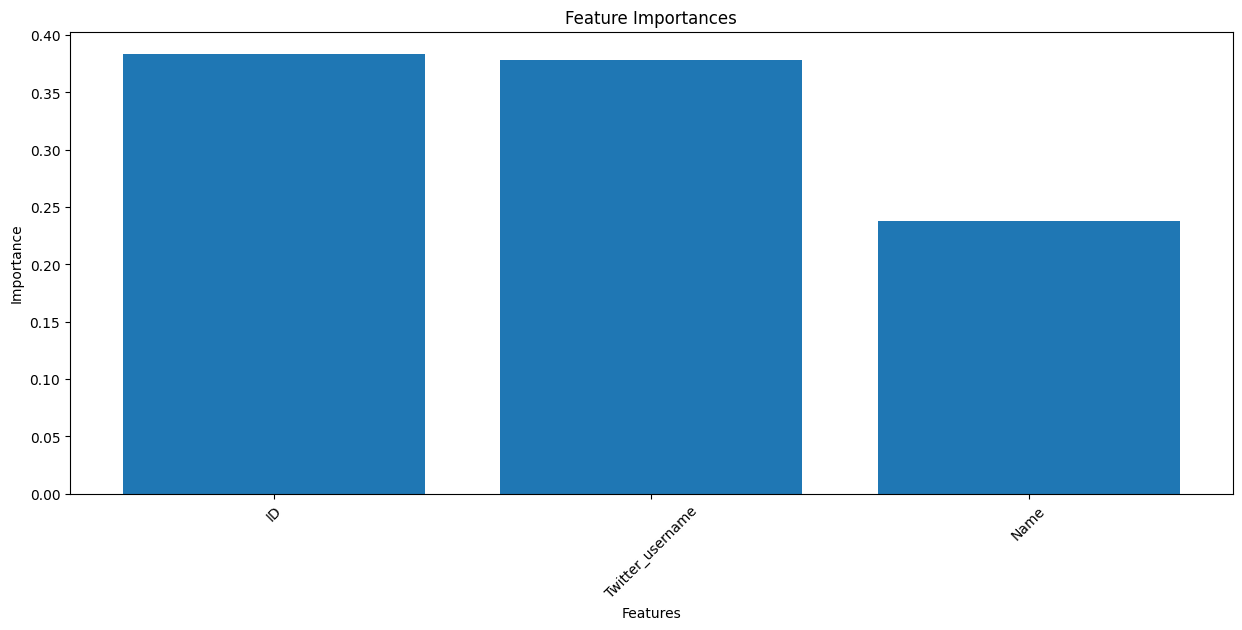

In [208]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Assuming 'pipeline' is the trained pipeline with RandomForestClassifier
classifier = pipeline.named_steps['classifier']

# to visualize a single decision tree (assuming RandomForestClassifier is used)
if isinstance(classifier, RandomForestClassifier):
    tree_to_visualize = classifier.estimators_[0]
    plt.figure(figsize=(15, 10))
    plot_tree(tree_to_visualize, feature_names=X_train.columns, class_names=classifier.classes_, filled=True)
    plt.show()

# to visualize feature importances for the entire random forest
# This will show a bar chart of feature importances
if isinstance(classifier, RandomForestClassifier):
    feature_importances = classifier.feature_importances_
    features = X_train.columns
    importance_dict = dict(zip(features, feature_importances))
    importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(15, 6))
    plt.bar(importance_dict.keys(), importance_dict.values())
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()


save that model

In [209]:
!pip install joblib


In [210]:
import joblib

# Save the trained pipeline (including the RandomForestClassifier) to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(pipeline, model_filename)

print(f"Model saved to {model_filename}")
#You can load this saved model later using joblib.load:

Model saved to random_forest_model.joblib


load that model and make a prediction using my data

In [211]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Now, you can use the loaded_model for making predictions on new data


In [215]:
import joblib
import pandas as pd

# Load the saved model
model_filename = 'random_forest_model.joblib'
loaded_model = joblib.load(model_filename)

# Assuming 'new_data' is a new DataFrame with the same features as your training data
new_data = pd.DataFrame({
    'ID': ['izip_2016', 'case_identifier'],
    'izip_2016': [10.5, 15.2],
    'case_identifier': [25.3, 30.1],
})

# Make predictions on the new data
try:
    predictions = loaded_model.predict(new_data)
    print(predictions)
except Exception as e:
    print(f"Error: {e}")


Error: "None of [Index(['Age', 'facebook_id'], dtype='object')] are in the [columns]"
